In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_excel('EntrySurvey_JaydenUpdated.xlsx')

In [98]:
df.columns.tolist()

['Start Date',
 'End Date',
 'Response Type',
 'IP Address',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'Recorded Date',
 'Response ID',
 'Recipient Last Name',
 'Recipient First Name',
 'Recipient Email',
 'External Data Reference',
 'Location Latitude',
 'Location Longitude',
 'Distribution Channel',
 'User Language',
 "Welcome to the REBOUND research study!\n\n\n\nWhat is the REBOUND study for?\n\nThe REBOUND study aims to understand how we can provide additional support to students in their academic journey. To participate in this study, you will be asked to complete a survey and answer questions about your progress in the unit for which you are taking the REBOUND classes. \n\n\n\nParticipation in the Survey:\n\nWhether you choose to participate or not will not impact your relationship with Macquarie University or your position/grades as a student.\n\n\n\nParticipation in this study is entirely voluntary: you are not obliged to participate. If you decide to participate, y

In [99]:
drop = ["Start Date", "End Date", "Response Type", "IP Address", "Duration (in seconds)", "Recipient Last Name", 'Recipient First Name',
 'Recipient Email', 'External Data Reference','Location Latitude','Location Longitude','Distribution Channel','User Language',
  'Do you wish to be notified via email, once the results of the survey has been processed at the end of the data collection?']

In [100]:
consent_col = [c for c in df.columns if c.startswith("Welcome to the REBOUND research study!")][0]

df = df[(df[consent_col] != "I do not consent, I do not wish to participate") &(~df[consent_col].isna())]

for col in df.columns:
    if col.startswith("Welcome to the REBOUND research study!"):
        drop.append(col)
df = df.drop(columns=drop, errors="ignore")

In [ ]:
rename_map = {
    "Select the unit you taking this particular REBOUND class for?": "Unit",
    "Are you a first-generation student to attend university? (First-generation student meaning you/ your siblings are the first ones to attend university)": "First Generation Student",
    "Are you a repeating student?": "Repeating Student",
    "What challenges did you face in your first attempt at the unit?\nPlease choose everything that applies. If you have other reasons not on the list, please list them in the other option.": "Challenges Faced",

    "How confident are you with the unit? - The Unit Content": "Confidence Unit Content",
    "How confident are you with the unit? - The Assessments": "Confidence Assessments",

    "What are your thoughts on the REBOUND classes so far? - The Content Covered": "Thoughts Content Covered",
    "What are your thoughts on the REBOUND classes so far? - The Facilitator": "Thoughts Facilitator",
    "What are your thoughts on the REBOUND classes so far? - Structure of the Classes": "Thoughts Structure of the Classes",
    
    "What are your expectations of the REBOUND classes? Why did you choose to attend them?": "Expectations of REBOUND Classes",
    "Can you give us feedback about the REBOUND classes, please? (What's working for you? How can these REBOUND classes be better? How can we improve?)": "Feedback",

    "Please enter your StudentID": "StudentID"
}

df = df.rename(columns=rename_map)

## Challenge mapping

In [102]:
challenge_map = {
    "The content of the unit was overwhelming": "Unit Content",
    "The assessments were too difficult to attempt": "Unit Content",
    "I wish I had more time to complete the assessments": "Unit Content",
    "I couldn't understand the lecturer": "Staff Involved in the Unit",
    "I couldn't understand the workshop instructor": "Staff Involved in the Unit",
    "The staff weren't approachable": "Staff Involved in the Unit",
    "It was my first semester, everything was overwhelming": "Other Factors",
    "I enrolled late and couldn't catch up with the contents of the unit": "Other Factors",
    "I didn't understand how to manage my time better": "Other Factors",
    "I had personal issues": "Other Factors"}

In [103]:
df_challenge= df[(df["Repeating Student"] == "Yes") & (df['Finished'] == True)].copy()

In [104]:
category_codes = {"Unit Content": 1,"Staff Involved in the Unit": 2,"Other": 3}

def extract(text):
    if pd.isna(text):
        return []
    return [t.strip() for t in str(text).split(",")]

df_challenge["Challenge_List"] = df_challenge["Challenges Faced"].apply(extract)

df_challenge_final = df_challenge.explode("Challenge_List")
df_challenge_final = df_challenge_final[df_challenge_final["Challenge_List"].notna()].copy()
df_challenge_final = df_challenge_final.rename(columns={"Challenge_List": "Challenge"})
df_challenge_final["Category"] = df_challenge_final["Challenge"].map(challenge_map)

df_challenge_final["Category"] = df_challenge_final["Category"].replace({"Other Factors": "Other"})
df_challenge_final["Category"] = df_challenge_final["Category"].fillna("Other")
df_challenge_final["CategoryCode"] = df_challenge_final["Category"].map(category_codes)

In [105]:
df_challenge_final = df_challenge_final[["Response ID", "Recorded Date", "Unit", "Repeating Student", "Challenge", "Category", "CategoryCode"]]
df_challenge_final.head(10)

,Response ID,Recorded Date,Unit,Repeating Student,Challenge,Category,CategoryCode
36,R_7l06YOuDK9aVQWf,2025-03-27 19:46:11,COMP1000- Introduction to Computer Programming,Yes,The content of the unit was overwhelming,Unit Content,1
36,R_7l06YOuDK9aVQWf,2025-03-27 19:46:11,COMP1000- Introduction to Computer Programming,Yes,I couldn't understand the lecturer,Staff Involved in the Unit,2
36,R_7l06YOuDK9aVQWf,2025-03-27 19:46:11,COMP1000- Introduction to Computer Programming,Yes,It was my first semester,Other,3
36,R_7l06YOuDK9aVQWf,2025-03-27 19:46:11,COMP1000- Introduction to Computer Programming,Yes,everything was overwhelming,Other,3
60,R_9F9rQgFuMiO1Mth,2025-07-20 19:27:53,COMP1350 - Introduction to Database Design and...,Yes,The assessments were too difficult to attempt,Unit Content,1
60,R_9F9rQgFuMiO1Mth,2025-07-20 19:27:53,COMP1350 - Introduction to Database Design and...,Yes,I couldn't understand the lecturer,Staff Involved in the Unit,2
60,R_9F9rQgFuMiO1Mth,2025-07-20 19:27:53,COMP1350 - Introduction to Database Design and...,Yes,I couldn't understand the workshop instructor,Staff Involved in the Unit,2
60,R_9F9rQgFuMiO1Mth,2025-07-20 19:27:53,COMP1350 - Introduction to Database Design and...,Yes,The staff weren't approachable,Staff Involved in the Unit,2
60,R_9F9rQgFuMiO1Mth,2025-07-20 19:27:53,COMP1350 - Introduction to Database Design and...,Yes,I didn't understand how to manage my time better,Other,3
60,R_9F9rQgFuMiO1Mth,2025-07-20 19:27:53,COMP1350 - Introduction to Database Design and...,Yes,I had personal issues,Other,3


### done map

In [106]:
df = df[df['Finished'] == True].reset_index(drop=True)

In [107]:
num_students = len(df)
print(f"Number of students who took the survey: {num_students}")

print("\n")

df['Recorded Date'] = pd.to_datetime(df['Recorded Date'])
session_1_df = df[df['Recorded Date'] <= '2025-06-30']
session_1_students = len(session_1_df)

s1_comp1350 = len(session_1_df[session_1_df['Unit'] == 'COMP1350 - Introduction to Database Design and Management'])
s1_comp1000 = len(session_1_df[session_1_df['Unit'] == 'COMP1000- Introduction to Computer Programming'])

total_s1 = session_1_students
pct_comp1350 = (s1_comp1350 / total_s1) * 100 
pct_comp1000 = (s1_comp1000 / total_s1) * 100

print(f"Session 1 Survey Responses: {session_1_students} students")
print(f"• COMP1350: {s1_comp1350} students ({pct_comp1350:.2f}%)")
print(f"• COMP1000: {s1_comp1000} students ({pct_comp1000:.2f}%)")

print("\n")
session_2_df = df[(df['Recorded Date'] >= '2025-07-01') &  (df['Recorded Date'] <= '2025-11-30')]
session_2_students = len(session_2_df)

s2_comp1350 = len(session_2_df[session_2_df['Unit'] == 'COMP1350 - Introduction to Database Design and Management'])

s2_comp1000 = len(session_2_df[session_2_df['Unit'] == 'COMP1000- Introduction to Computer Programming'])
total_s2 = session_2_students
pct_comp1350_s2 = (s2_comp1350 / total_s2) * 100 
pct_comp1000_s2 = (s2_comp1000 / total_s2) * 100
print(f"Session 2 Survey Responses: {session_2_students} students")
print(f"• COMP1350: {s2_comp1350} students ({pct_comp1350_s2:.2f}%)")
print(f"• COMP1000: {s2_comp1000} students ({pct_comp1000_s2:.2f}%)")

Number of students who took the survey: 72


Session 1 Survey Responses: 47 students
• COMP1350: 19 students (40.43%)
• COMP1000: 28 students (59.57%)


Session 2 Survey Responses: 25 students
• COMP1350: 9 students (36.00%)
• COMP1000: 16 students (64.00%)


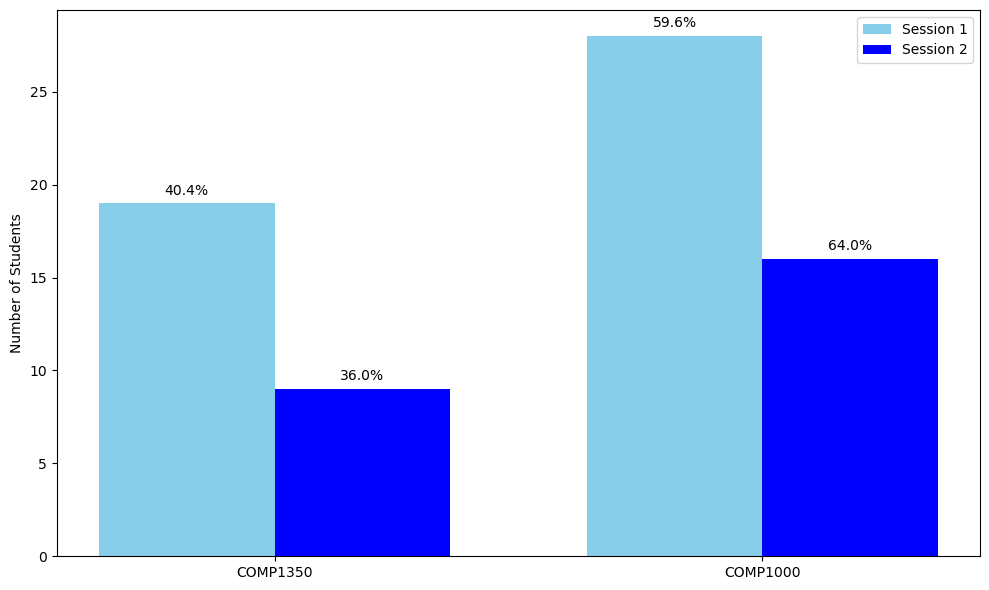

In [108]:
units = ['COMP1350', 'COMP1000']
s1_values = [s1_comp1350, s1_comp1000]
s2_values = [s2_comp1350, s2_comp1000]

pct_s1 = [pct_comp1350, pct_comp1000]
pct_s2 = [pct_comp1350_s2, pct_comp1000_s2]

x = np.arange(len(units))
width = 0.36

plt.figure(figsize=(10,6))
bars1 = plt.bar(x-width/2, s1_values, width, label="Session 1", color="skyblue")
bars2 = plt.bar(x+width/2, s2_values, width, label="Session 2", color="blue")

for i, bar in enumerate(bars1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3,
             f"{pct_s1[i]:.1f}%", ha='center', va='bottom', fontsize=10)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3,
             f"{pct_s2[i]:.1f}%", ha='center', va='bottom', fontsize=10)
plt.xticks(x, units)
plt.ylabel("Number of Students")
plt.legend()
plt.tight_layout()
plt.show()

### Checkpoint

In [109]:
map = {"Yes": 1,"No": 0}
df["First Generation Student"] = df["First Generation Student"].map(map)
df["Repeating Student"] = df["Repeating Student"].map(map)

confidence = {"Very Confident": 4, "Confident": 3, "Somewhat Confident": 2, "Not Confident at all": 1}
df["Confidence Unit Content"] = df["Confidence Unit Content"].map(confidence)
df["Confidence Assessments"] = df["Confidence Assessments"].map(confidence)
thought = {"Very Helpful": 4, "Fairly helpful": 3, "Somewhat helpful": 2, "Not helpful at all": 1}
thought_cols = ["Thoughts Content Covered", "Thoughts Facilitator", "Thoughts Structure of the Classes"]

for col in thought_cols: 
    df[col] = df[col].map(thought)

In [110]:
df.head()

,Progress,Finished,Recorded Date,Response ID,StudentID,Unit,First Generation Student,Repeating Student,Challenges Faced,Confidence Unit Content,Confidence Assessments,Thoughts Content Covered,Thoughts Facilitator,Thoughts Structure of the Classes,Expectations of REBOUND Classes,Feedback
0,100,True,2025-03-10 06:06:27,R_9ESqRCMK53U8tB7,48571695.0,COMP1350 - Introduction to Database Design and...,0,0,NaN,2,2,3,3,3,i want to understand clearly about my unit lesson,i haven't attended yet
1,100,True,2025-03-12 22:09:15,R_4QQuBZnBdegScN3,490183898.0,COMP1350 - Introduction to Database Design and...,1,0,NaN,2,2,3,3,3,to understand deeply and reviewing the lesson ...,It is very helpful for extra support and more ...
2,100,True,2025-03-12 23:46:42,R_4SfKzCGFiH8cnuN,49112392.0,COMP1350 - Introduction to Database Design and...,1,0,NaN,3,3,4,4,4,NaN,NaN
3,,True,2025-03-12 23:51:58,R_41wFZFG4aUWWTXr,48682403.0,COMP1350 - Introduction to Database Design and...,1,0,NaN,3,3,4,4,4,'- I think of the rebound session as a way to ...,"So far, I have no requests for changes."
4,100,True,2025-03-12 23:52:02,R_9dgJwUHeUw67XNc,45662126.0,COMP1350 - Introduction to Database Design and...,0,0,NaN,2,2,4,4,3,I missed the first 3 weeks of class because I ...,I understand a bit better about the content


In [111]:
components = [
    "Thoughts Content Covered",
    "Thoughts Facilitator",
    "Thoughts Structure of the Classes"
]

rating_labels = {
    4: "Very Helpful",
    3: "Fairly Helpful",
    2: "Somewhat Helpful",
    1: "Not helpful at all"
}
df['Recorded Date'] = pd.to_datetime(df['Recorded Date'], errors='coerce')

sessions = {
    "Session 1": df[df["Recorded Date"] <= "2025-06-30"],
    "Session 2": df[(df["Recorded Date"] >= "2025-07-01") & (df["Recorded Date"] <= "2025-11-30")]
}

units = {
    "COMP1350": "COMP1350 - Introduction to Database Design and Management",
    "COMP1000": "COMP1000- Introduction to Computer Programming",
}

rows =[]
for session_name, session_df in sessions.items():
    for short_unit, full_unit in units.items():
        sub_df = session_df[session_df["Unit"] == full_unit]

        for comp in components:
            comp_series = sub_df[comp].dropna()
            if len(comp_series) == 0:
                continue
            pct = comp_series.value_counts(normalize=True).mul(100).round(2)

            rows.append({
                "Unit": short_unit,
                "Session": session_name,
                "Component": comp,
                "Very Helpful": pct.get(4, 0),
                "Fairly helpful": pct.get(3, 0),
                "Somewhat helpful": pct.get(2, 0),
                "Not helpful at all": pct.get(1, 0)
            })

table = pd.DataFrame(rows)
table

,Unit,Session,Component,Very Helpful,Fairly helpful,Somewhat helpful,Not helpful at all
0,COMP1350,Session 1,Thoughts Content Covered,57.89,42.11,0.00,0.00
1,COMP1350,Session 1,Thoughts Facilitator,68.42,31.58,0.00,0.00
2,COMP1350,Session 1,Thoughts Structure of the Classes,57.89,42.11,0.00,0.00
3,COMP1000,Session 1,Thoughts Content Covered,71.43,25.00,3.57,0.00
4,COMP1000,Session 1,Thoughts Facilitator,71.43,25.00,3.57,0.00
5,COMP1000,Session 1,Thoughts Structure of the Classes,64.29,25.00,7.14,3.57
6,COMP1350,Session 2,Thoughts Content Covered,66.67,11.11,22.22,0.00
7,COMP1350,Session 2,Thoughts Facilitator,55.56,22.22,22.22,0.00
8,COMP1350,Session 2,Thoughts Structure of the Classes,33.33,44.44,22.22,0.00
9,COMP1000,Session 2,Thoughts Content Covered,50.00,25.00,18.75,6.25


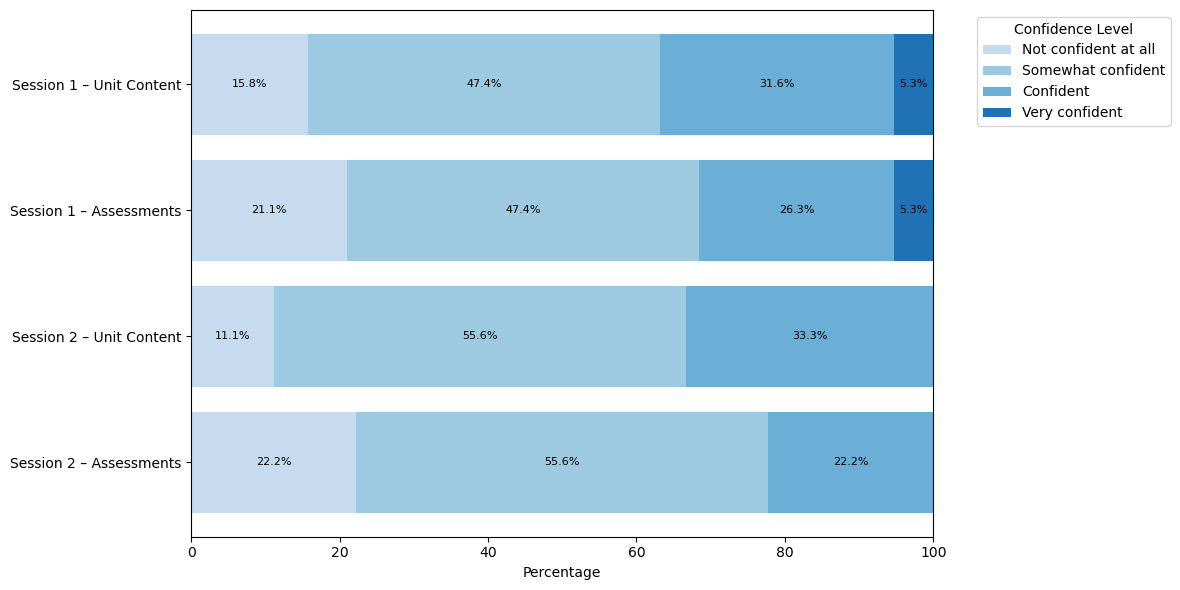

In [112]:
conf_cols = ["Confidence Unit Content", "Confidence Assessments"]
levels = [1, 2, 3, 4]
labels = {1: "Not confident at all", 2: "Somewhat confident", 3: "Confident", 4: "Very confident"}
colors = ["#c6dbef","#9ecae1","#6baed6","#2171b5"]

u1350 = "COMP1350 - Introduction to Database Design and Management"
df1350 = df[df["Unit"] == u1350]

session_1 = df1350[df1350["Recorded Date"] <= "2025-06-30"]
session_2 = df1350[(df1350["Recorded Date"] >= "2025-07-01") & (df1350["Recorded Date"] <= "2025-11-30")]

def get_dist(sub, col):
    return (
        sub[col].value_counts(normalize=True)
        .reindex([1,2,3,4], fill_value=0) * 100
    )

rows = [("Session 1 – Unit Content", get_dist(session_1, "Confidence Unit Content")),("Session 1 – Assessments", get_dist(session_1, "Confidence Assessments")),
        ("Session 2 – Unit Content", get_dist(session_2, "Confidence Unit Content")),("Session 2 – Assessments", get_dist(session_2, "Confidence Assessments")),]

df_plot = pd.DataFrame([(label, *dist.values) for label, dist in rows],columns=["Label", 1, 2, 3, 4]).set_index("Label")
plt.figure(figsize=(12, 6))
left = [0] * len(df_plot)

for i, lvl in enumerate(levels):
    bars = plt.barh(
        df_plot.index, df_plot[lvl],
        left=left, color=colors[i], label=labels[lvl])
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
                f"{width:.1f}%",
                ha="center", va="center", fontsize=8)
    left = left + df_plot[lvl]

plt.xlabel("Percentage")
plt.legend(title="Confidence Level", bbox_to_anchor=(1.05, 1), loc="upper left")
ax = plt.gca()
ax.invert_yaxis()
plt.tight_layout()

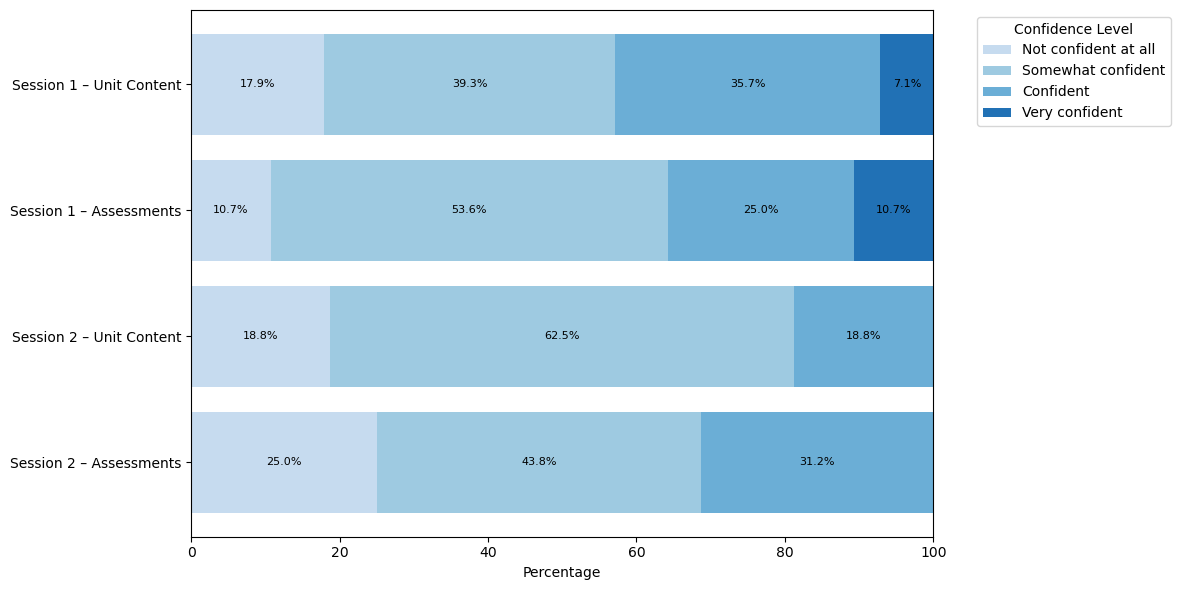

In [113]:
conf_cols = ["Confidence Unit Content", "Confidence Assessments"]
levels = [1, 2, 3, 4]
labels = {1: "Not confident at all",2: "Somewhat confident",3: "Confident",4: "Very confident"}

u1000 = "COMP1000- Introduction to Computer Programming"
df1000 = df[df["Unit"] == u1000]

session_1 = df1000[df1000["Recorded Date"] <= "2025-06-30"]
session_2 = df1000[(df1000["Recorded Date"] >= "2025-07-01") & (df1000["Recorded Date"] <= "2025-11-30")]

def get_dist(sub, col):
    return (sub[col].value_counts(normalize=True).reindex([1,2,3,4], fill_value=0) * 100)

rows = [("Session 1 – Unit Content", get_dist(session_1, "Confidence Unit Content")),("Session 1 – Assessments", get_dist(session_1, "Confidence Assessments")),
    ("Session 2 – Unit Content", get_dist(session_2, "Confidence Unit Content")),("Session 2 – Assessments", get_dist(session_2, "Confidence Assessments")),]

df_plot = pd.DataFrame(
    [(label, *dist.values) for label, dist in rows],
    columns=["Label", 1, 2, 3, 4]
).set_index("Label")

plt.figure(figsize=(12, 6))
left = [0] * len(df_plot)

for i, lvl in enumerate(levels):
    bars = plt.barh(df_plot.index, df_plot[lvl],left=left,
        color=colors[i],
        label=labels[lvl])
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(bar.get_x() + width/2,bar.get_y() + bar.get_height()/2,
                f"{width:.1f}%",
                ha="center", va="center", fontsize=8)
    left = left + df_plot[lvl]

plt.xlabel("Percentage")
plt.legend(title="Confidence Level", bbox_to_anchor=(1.05, 1), loc="upper left")
ax = plt.gca()
ax.invert_yaxis()
plt.tight_layout()

### Checkpoint

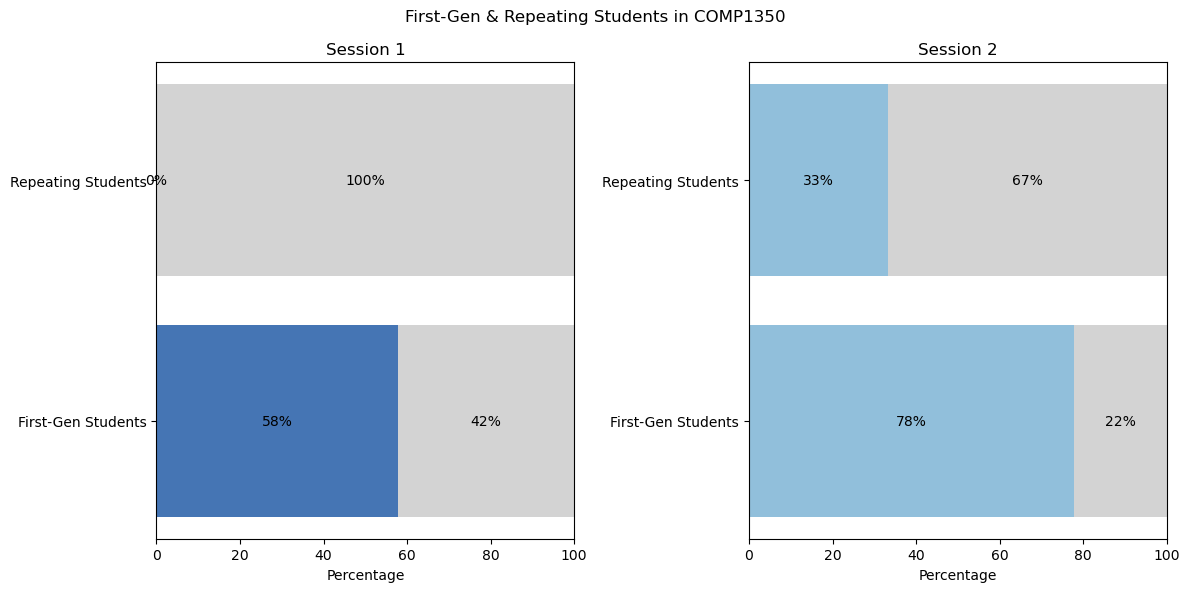

In [114]:
groups = ["First Generation Student", "Repeating Student"]
u1350 = "COMP1350 - Introduction to Database Design and Management"
colors = ["#4575b4", "#91bfdb"]

s1_1350 = df[(df["Unit"] == u1350) & (df["Recorded Date"] <= "2025-06-30")]
s2_1350 = df[(df["Unit"] == u1350) & (df["Recorded Date"] >= "2025-07-01") &(df["Recorded Date"] <= "2025-11-30")] 

def compute_group_stats(subset):
    stats = {}
    for g in groups:
        stats[g] = subset[g].mean() * 100
    return stats

stats_s1 = compute_group_stats(s1_1350)
stats_s2 = compute_group_stats(s2_1350)

plot_df_s1 = pd.DataFrame(stats_s1, index=["Session 1"]).T
plot_df_s2 = pd.DataFrame(stats_s2, index=["Session 2"]).T

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

y_labels = ["First-Gen Students", "Repeating Students"]

percentages_s1 = [plot_df_s1.loc[g, "Session 1"] for g in plot_df_s1.index]
complement_s1 = [100 - p for p in percentages_s1]

ax = axes[0]
ax.barh(y_labels, percentages_s1, color=colors[0], label="Yes")
ax.barh(y_labels, complement_s1, left=percentages_s1, color="lightgrey", label="No")

for i, p in enumerate(percentages_s1):
    ax.text(p/2, i, f"{p:.0f}%", ha="center", va="center", color="black")
    ax.text(p + complement_s1[i]/2, i, f"{complement_s1[i]:.0f}%", ha="center", va="center")

ax.set_title("Session 1")
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage")

percentages_s2 = [plot_df_s2.loc[g, "Session 2"] for g in plot_df_s2.index]
complement_s2 = [100 - p for p in percentages_s2]

ax = axes[1]
ax.barh(y_labels, percentages_s2, color=colors[1], label="Yes")
ax.barh(y_labels, complement_s2, left=percentages_s2, color="lightgrey", label="No")

for i, p in enumerate(percentages_s2):
    ax.text(p/2, i, f"{p:.0f}%", ha="center", va="center", color="black")
    ax.text(p + complement_s2[i]/2, i, f"{complement_s2[i]:.0f}%", ha="center", va="center")

ax.set_title("Session 2")
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage")

plt.suptitle("First-Gen & Repeating Students in COMP1350")
plt.tight_layout()

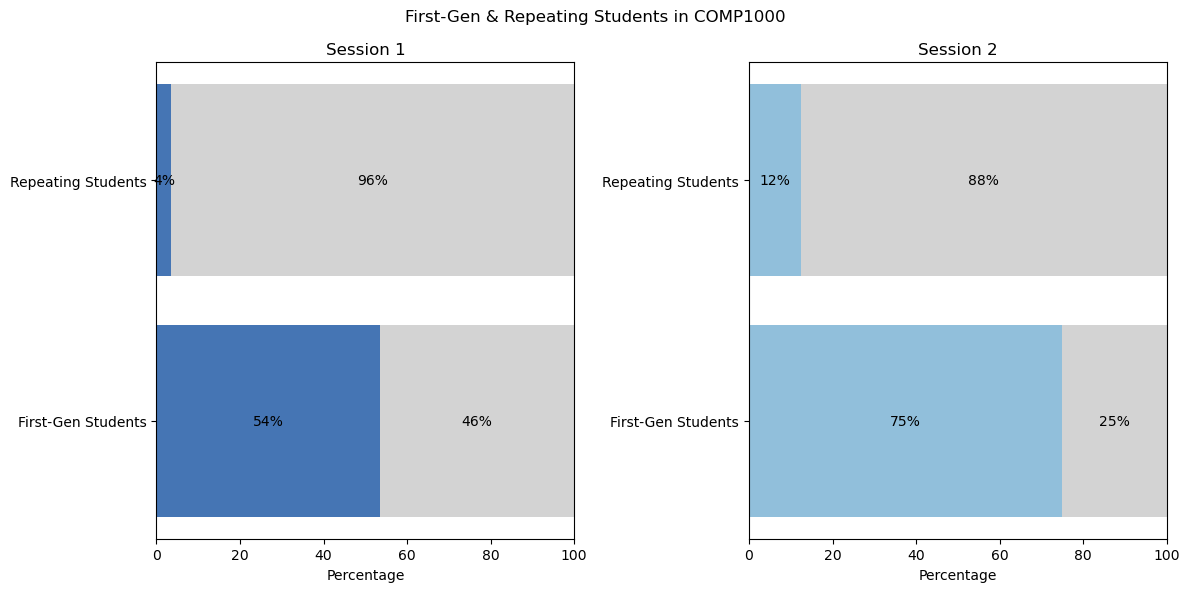

In [115]:
groups = ["First Generation Student", "Repeating Student"]
u1000 = "COMP1000- Introduction to Computer Programming"

s1_1000 = df[(df["Unit"] == u1000) & (df["Recorded Date"] <= "2025-06-30")]
s2_1000 = df[(df["Unit"] == u1000) &(df["Recorded Date"] >= "2025-07-01") &(df["Recorded Date"] <= "2025-11-30")] 

def compute_group_stats(subset):
    stats = {}
    for g in groups:
        stats[g] = subset[g].mean() * 100
    return stats

stats_s1 = compute_group_stats(s1_1000)
stats_s2 = compute_group_stats(s2_1000)

plot_df_s1 = pd.DataFrame(stats_s1, index=["Session 1"]).T
plot_df_s2 = pd.DataFrame(stats_s2, index=["Session 2"]).T

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

y_labels = ["First-Gen Students", "Repeating Students"]

percentages_s1 = [plot_df_s1.loc[g, "Session 1"] for g in plot_df_s1.index]
complement_s1 = [100 - p for p in percentages_s1]

ax = axes[0]
ax.barh(y_labels, percentages_s1, color=colors[0], label="Yes")
ax.barh(y_labels, complement_s1, left=percentages_s1, color="lightgrey", label="No")

for i, p in enumerate(percentages_s1):
    ax.text(p/2, i, f"{p:.0f}%", ha="center", va="center", color="black")
    ax.text(p + complement_s1[i]/2, i, f"{complement_s1[i]:.0f}%", ha="center", va="center")

ax.set_title("Session 1")
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage")

percentages_s2 = [plot_df_s2.loc[g, "Session 2"] for g in plot_df_s2.index]
complement_s2 = [100 - p for p in percentages_s2]

ax = axes[1]
ax.barh(y_labels, percentages_s2, color=colors[1], label="Yes")
ax.barh(y_labels, complement_s2, left=percentages_s2, color="lightgrey", label="No")

for i, p in enumerate(percentages_s2):
    ax.text(p/2, i, f"{p:.0f}%", ha="center", va="center", color="black")
    ax.text(p + complement_s2[i]/2, i, f"{complement_s2[i]:.0f}%", ha="center", va="center")

ax.set_title("Session 2")
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage")

plt.suptitle("First-Gen & Repeating Students in COMP1000")
plt.tight_layout()

### Checkpoint

In [116]:
df_challenge_final.head()

,Response ID,Recorded Date,Unit,Repeating Student,Challenge,Category,CategoryCode
36,R_7l06YOuDK9aVQWf,2025-03-27 19:46:11,COMP1000- Introduction to Computer Programming,Yes,The content of the unit was overwhelming,Unit Content,1
36,R_7l06YOuDK9aVQWf,2025-03-27 19:46:11,COMP1000- Introduction to Computer Programming,Yes,I couldn't understand the lecturer,Staff Involved in the Unit,2
36,R_7l06YOuDK9aVQWf,2025-03-27 19:46:11,COMP1000- Introduction to Computer Programming,Yes,It was my first semester,Other,3
36,R_7l06YOuDK9aVQWf,2025-03-27 19:46:11,COMP1000- Introduction to Computer Programming,Yes,everything was overwhelming,Other,3
60,R_9F9rQgFuMiO1Mth,2025-07-20 19:27:53,COMP1350 - Introduction to Database Design and...,Yes,The assessments were too difficult to attempt,Unit Content,1


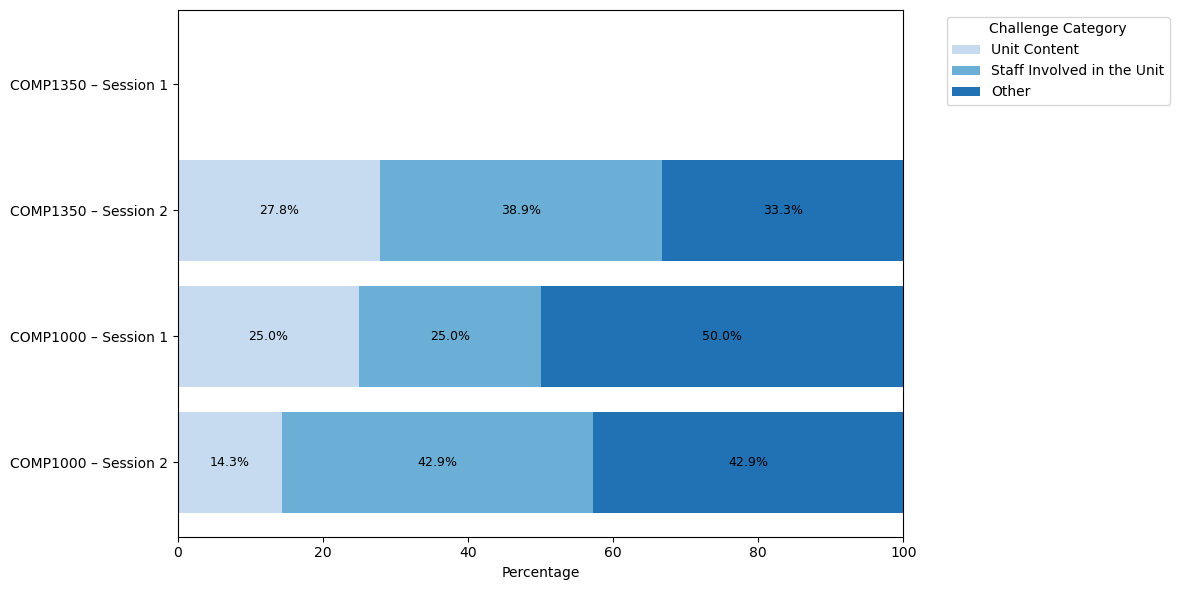

In [117]:
order = ["Unit Content", "Staff Involved in the Unit", "Other"]
colors = ["#c6dbef","#6baed6","#2171b5"]

u1350 = "COMP1350 - Introduction to Database Design and Management"
u1000 = "COMP1000- Introduction to Computer Programming"
def session_1(df):
    return df[df["Recorded Date"] <= "2025-06-30"]

def session_2(df):
    return df[(df["Recorded Date"] >= "2025-07-01") & (df["Recorded Date"] <= "2025-11-30")]

def compute_pct(sub):
    pct = (sub["Category"].value_counts(normalize=True).reindex(order, fill_value=0).mul(100).round(1))
    return pct

sections = {
    "COMP1350 – Session 1": compute_pct(session_1(df_challenge_final[df_challenge_final["Unit"] == u1350])),
    "COMP1350 – Session 2": compute_pct(session_2(df_challenge_final[df_challenge_final["Unit"] == u1350])),
    "COMP1000 – Session 1": compute_pct(session_1(df_challenge_final[df_challenge_final["Unit"] == u1000])),
    "COMP1000 – Session 2": compute_pct(session_2(df_challenge_final[df_challenge_final["Unit"] == u1000])),
}

plot_df = pd.DataFrame(sections).T

plt.figure(figsize=(12, 6))
left = [0] * len(plot_df)
for i, cat in enumerate(order):
    vals = plot_df[cat]
    bars = plt.barh(plot_df.index, vals, left=left, color=colors[i], label=cat)
    for bar, val in zip(bars, vals):
        if val > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + bar.get_height()/2,
                f"{val:.1f}%",
                ha="center", va="center", fontsize=9
            )

    left = left + vals

plt.xlabel("Percentage")
plt.xlim(0, 100)
plt.legend(title="Challenge Category", bbox_to_anchor=(1.05, 1), loc="upper left")
ax = plt.gca()
ax.invert_yaxis()
plt.tight_layout()
plt.show()

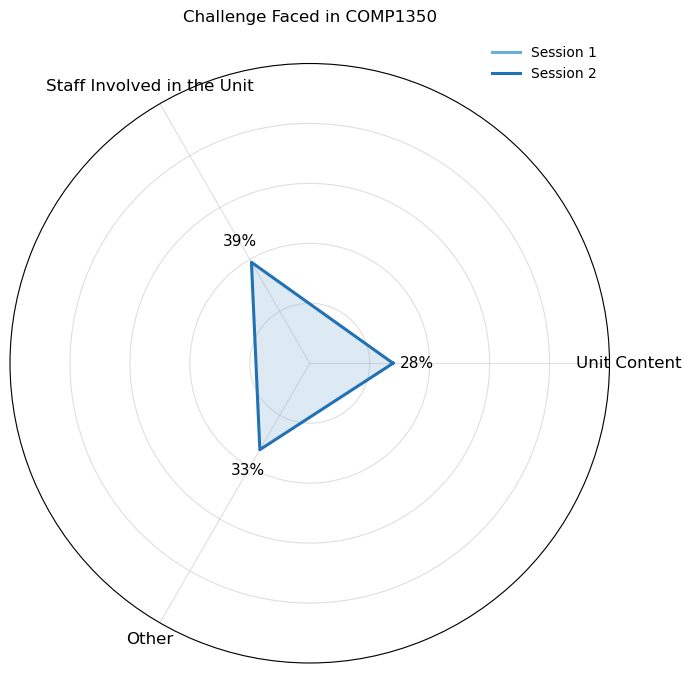

In [118]:
sections = {
    "Session 1": compute_pct(session_1(df_challenge_final[df_challenge_final["Unit"] == u1350])),
    "Session 2": compute_pct(session_2(df_challenge_final[df_challenge_final["Unit"] == u1350]))}
plot_df = pd.DataFrame(sections).T
df_1350 = plot_df.loc[["Session 1", "Session 2"], order]

categories = order
N = len(categories)

def close(v):
    return np.concatenate([v, v[:1]])

angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = close(angles)

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

colors = ["#6baed6", "#2171b5"]
offsets = [-8, +8] 

for i, (label, row) in enumerate(df_1350.iterrows()):
    values = close(row.values)
    ax.plot(angles, values, linewidth=2.2, color=colors[i], label=label)
    ax.fill(angles, values, alpha=0.15, color=colors[i])
    for angle, val in zip(angles[:-1], row.values):
        ax.text(
            angle,
            val + offsets[i],
            f"{val:.0f}%",
            ha="center",
            va="center",
            fontsize=11
        )
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_yticklabels([])

ax.set_rlim(0, 100)
ax.grid(alpha=0.4)

plt.title("Challenge Faced in COMP1350", pad=30)
plt.legend(loc="upper right", bbox_to_anchor=(1, 1.05), frameon=False)
plt.tight_layout()
plt.show()

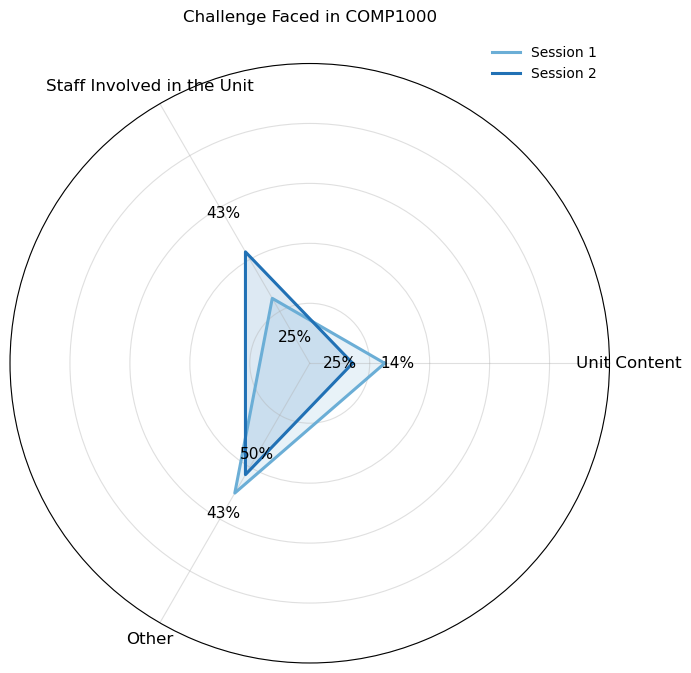

In [119]:
sections = {
    "Session 1": compute_pct(session_1(df_challenge_final[df_challenge_final["Unit"] == u1000])),
    "Session 2": compute_pct(session_2(df_challenge_final[df_challenge_final["Unit"] == u1000]))}
plot_df = pd.DataFrame(sections).T
df_1000 = plot_df.loc[["Session 1", "Session 2"], order]

categories = order
N = len(categories)

def close(v):
    return np.concatenate([v, v[:1]])

angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = close(angles)

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

colors = ["#6baed6", "#2171b5"]
offsets = [-15, +15]

for i, (label, row) in enumerate(df_1000.iterrows()):
    values = close(row.values)
    ax.plot(angles, values, linewidth=2.2, color=colors[i], label=label)
    ax.fill(angles, values, alpha=0.15, color=colors[i])

    for angle, val in zip(angles[:-1], row.values):
        ax.text(
            angle,
            val + offsets[i],
            f"{val:.0f}%",
            ha="center",
            va="center",
            fontsize=11
        )

# Formatting
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_yticklabels([])

ax.set_rlim(0, 100)
ax.grid(alpha=0.4)

plt.title("Challenge Faced in COMP1000", pad=30)
plt.legend(loc="upper right", bbox_to_anchor=(1, 1.05), frameon=False)
plt.tight_layout()
plt.show()

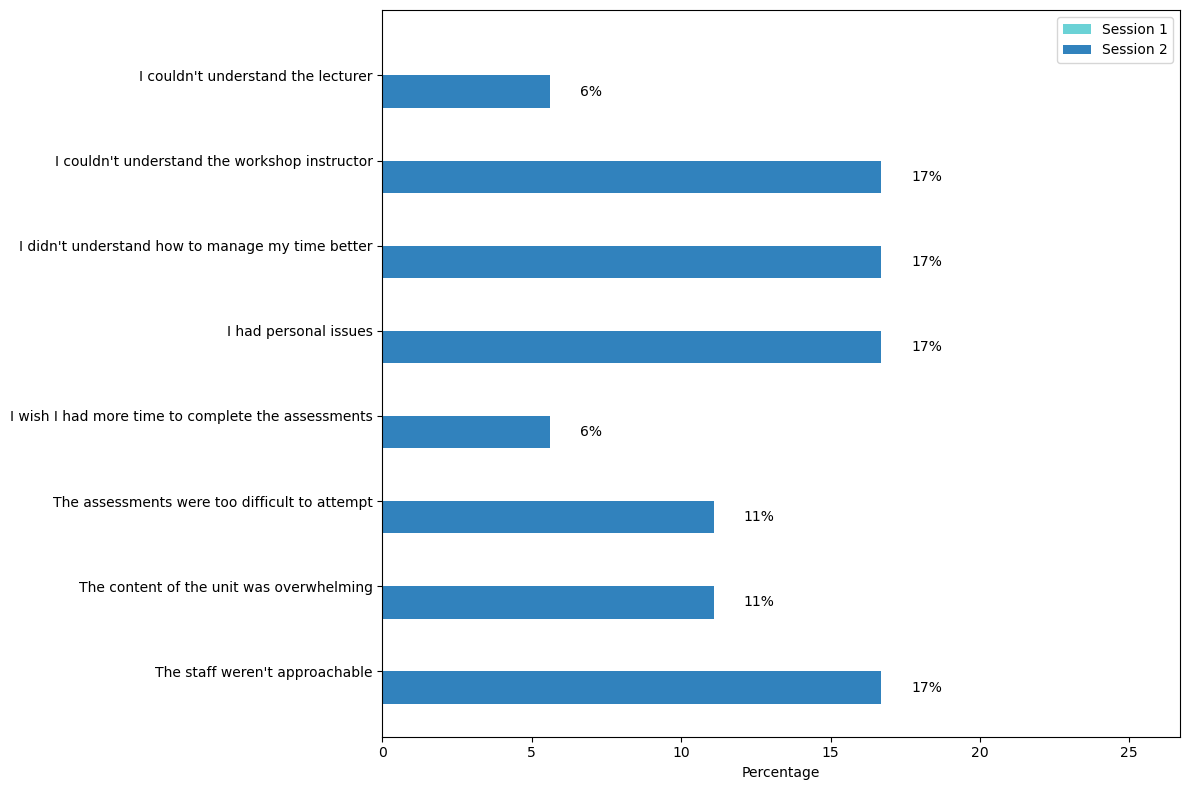

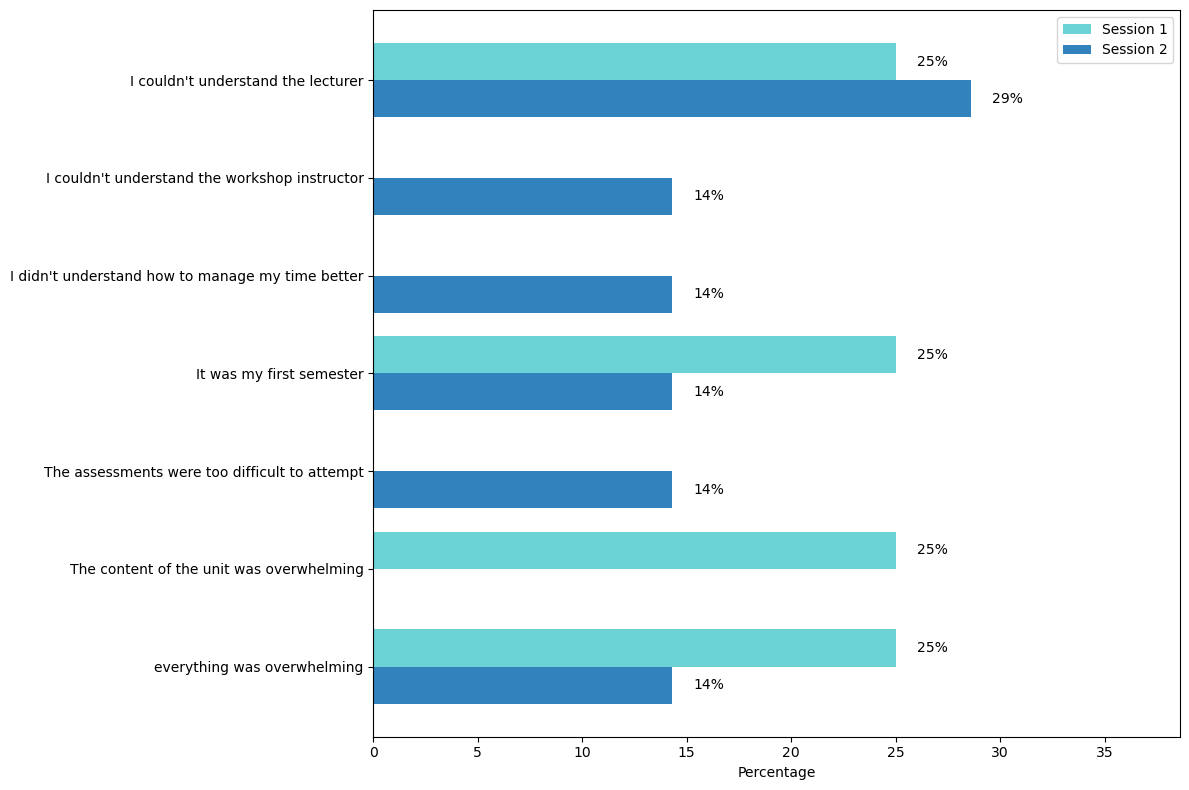

In [120]:
u1350 = "COMP1350 - Introduction to Database Design and Management"
u1000 = "COMP1000- Introduction to Computer Programming"
def session_1(df):
    return df[df["Recorded Date"] <= "2025-06-30"]

def session_2(df):
    return df[(df["Recorded Date"] >= "2025-07-01") & 
              (df["Recorded Date"] <= "2025-11-30")]

def get_challenge_pct(df_unit):
    pct = (
        df_unit["Challenge"]
        .value_counts(normalize=True)
        .mul(100)
        .round(1)
        .rename("pct")
        .to_frame())
    return pct
df1350 = df_challenge_final[df_challenge_final["Unit"] == u1350]

s1_1350 = get_challenge_pct(session_1(df1350))
s2_1350 = get_challenge_pct(session_2(df1350))

merged_1350 = s1_1350.rename(columns={"pct": "S1"}).join(
    s2_1350.rename(columns={"pct": "S2"}),
    how="outer").fillna(0)

df1000 = df_challenge_final[df_challenge_final["Unit"] == u1000]

s1_1000 = get_challenge_pct(session_1(df1000))
s2_1000 = get_challenge_pct(session_2(df1000))

merged_1000 = s1_1000.rename(columns={"pct": "S1"}).join(
    s2_1000.rename(columns={"pct": "S2"}),
    how="outer").fillna(0)

def plot_unit_challenges(df_plot, title):
    challenges = df_plot.index
    x = np.arange(len(challenges))
    width = 0.38

    plt.figure(figsize=(12, 8))

    plt.barh(x - width/2, df_plot["S1"], height=width, label="Session 1", color="#6bd2d6")
    plt.barh(x + width/2, df_plot["S2"], height=width, label="Session 2", color="#3182bd")
    for i, v in enumerate(df_plot["S1"]):
        if v > 0:
            plt.text(v + 1, i - width/2, f"{v:.0f}%", va="center")

    for i, v in enumerate(df_plot["S2"]):
        if v > 0:
            plt.text(v + 1, i + width/2, f"{v:.0f}%", va="center")

    plt.yticks(x, challenges)
    plt.xlabel("Percentage")
    plt.title(title)
    plt.xlim(0, max(df_plot.max()) + 10)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
plot_unit_challenges(merged_1350, "")
plot_unit_challenges(merged_1000, "")